# Post-processing the MD trajectory

In [17]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib import text
import matplotlib
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition, mark_inset
from scipy import ndimage
from matplotlib.colors import LogNorm

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'

In [19]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{mathptmx}'

In [2]:
def errbar(data):
    nsamp = 10
    nevery = int(data.shape[0] / nsamp)
    data_ = np.zeros(nsamp)
    for k in range(nsamp):
        data_[k] = data[k*nevery:(k+1)*nevery].mean()
    errbar_ = np.sqrt(data_.var()/(nsamp-1))
    return errbar_

In [3]:
def rdf_mean_err(goo):
    return goo.mean(axis=0), np.sqrt(goo.var(axis=0))/3

In [5]:
goo = np.load("g11.npy")
goo_mean, goo_err = rdf_mean_err(goo[:, :, 1])

In [6]:
goh = np.load("g12.npy")
goh_mean, goh_err = rdf_mean_err(goh[:, :, 1])

In [7]:
ghh = np.load("g22.npy")
ghh_mean, ghh_err = rdf_mean_err(ghh[:, :, 1])

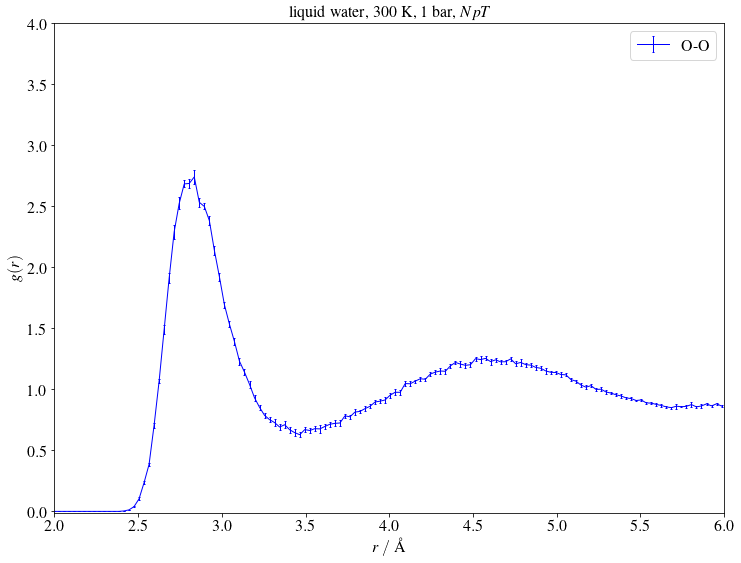

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 9), facecolor="white")
plt.title("liquid water, 300 K, 1 bar, $NpT$", fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(2.0, 6.0)
plt.yticks(np.arange(0, 5, 0.5), fontsize=16)
plt.ylim(-0.01, 4.0)
plt.xlabel("$r\ /\ \mathrm{\AA}$", fontsize=16)
plt.ylabel("$g(r)$", fontsize=16)
plt.errorbar(x=goo[0, :, 0], y=goo_mean, yerr=goo_err, color = "blue", linewidth=1.0, capsize=1, label="O-O")

plt.legend(fontsize=16)


<ErrorbarContainer object of 3 artists>

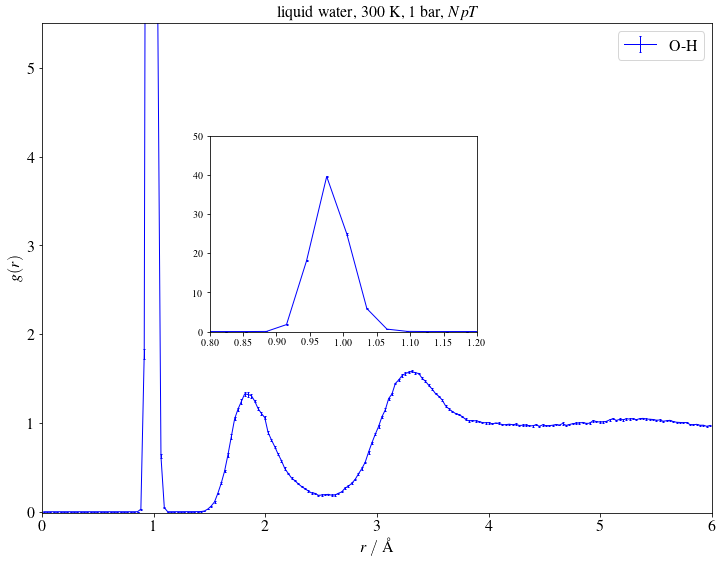

In [21]:
fig, ax = plt.subplots(1, figsize=(12, 9), facecolor="white")
plt.title("liquid water, 300 K, 1 bar, $NpT$", fontsize=16)
ax.set_xlim(0.0, 6.0)
ax.set_ylim(-0.01, 5.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("$r\ /\ \mathrm{\AA}$", fontsize=16)
ax.set_ylabel("$g(r)$", fontsize=16)
plt.errorbar(x=goh[0, :, 0], y=goh_mean, yerr=goh_err, color = "blue", linewidth=1.0, capsize=1, label="O-H")

plt.legend(fontsize=16)

axins = inset_axes(ax, width=0.8, height=0.6)
ip = InsetPosition(ax, [0.25,0.37,0.4,0.4])
axins.set_axes_locator(ip)
axins.set_xlim(0.8, 1.2)
axins.set_ylim(-0.01,50.0)

axins.errorbar(x=goh[0, :, 0], y=goh_mean, yerr=goh_err, color = "blue", linewidth=1.0, capsize=1, label="O-H")


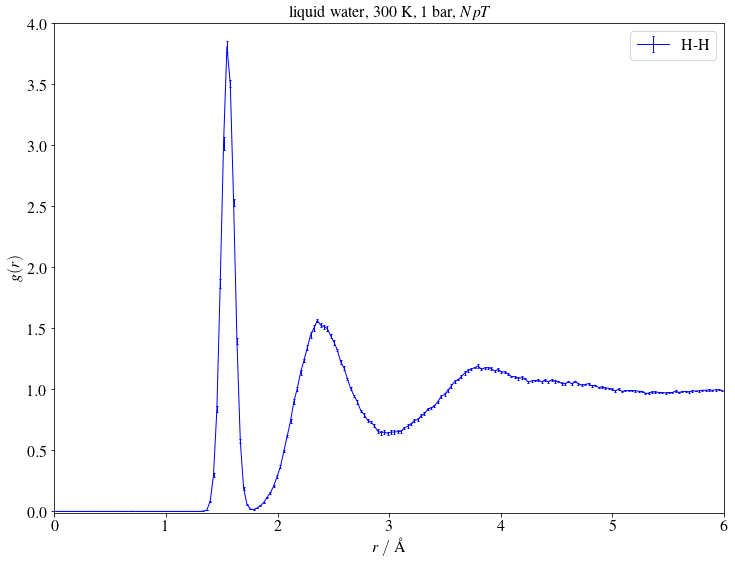

In [22]:
fig, ax = plt.subplots(1, figsize=(12, 9), facecolor="white")
plt.title("liquid water, 300 K, 1 bar, $NpT$", fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(0.0, 6.0)
plt.yticks(np.arange(0, 5, 0.5), fontsize=16)
plt.ylim(-0.01, 4.0)
plt.xlabel("$r\ /\ \mathrm{\AA}$", fontsize=16)
plt.ylabel("$g(r)$", fontsize=16)
plt.errorbar(x=ghh[0, :, 0], y=ghh_mean, yerr=ghh_err, color = "blue", linewidth=1.0, capsize=1, label="H-H")


plt.legend(fontsize=16)